## $$ Bank Customer Churn Modeling $$

```by TSR```

### **Data Import**

In [1]:
#!/bin/bash
# !kaggle datasets download barelydedicated/bank-customer-churn-modeling

In [2]:
# !unzip bank-customer-churn-modeling.zip

### **Data Cleaning**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.drop(['RowNumber', 'Surname', 'CustomerId'], axis=1, inplace=True)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.shape

(10000, 11)

In [9]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
creditScore = df.CreditScore
print(np.median(creditScore))
print(np.median(creditScore)/3)
print(f"{np.mean(creditScore):.2f}")

652.0
217.33333333333334
650.53


<function matplotlib.pyplot.show(close=None, block=None)>

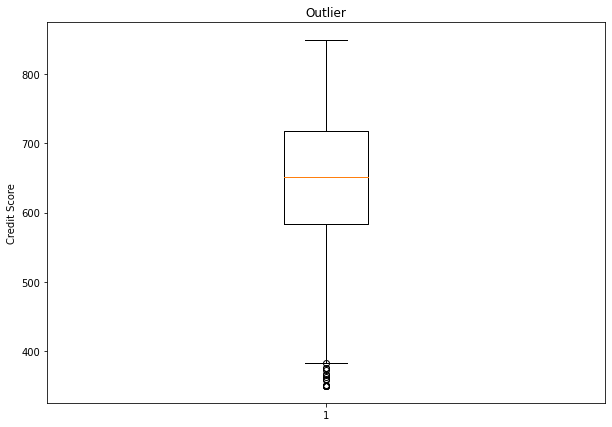

In [13]:
plt.figure(figsize=(10,7))
plt.boxplot(df.CreditScore)
plt.title('Outlier')
plt.ylabel('Credit Score')
plt.show

In [14]:
df.shape

(10000, 11)

In [15]:
Outlier = df[df.CreditScore<400].index
Outlier.shape

(19,)

In [16]:
df1 = df.drop(Outlier)

In [17]:
df1.shape

(9981, 11)

<function matplotlib.pyplot.show(close=None, block=None)>

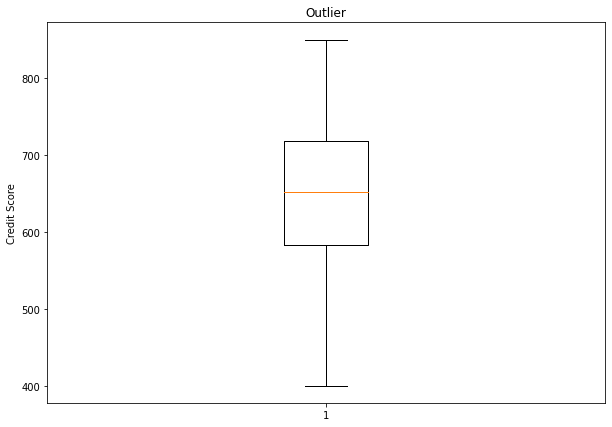

In [18]:
plt.figure(figsize=(10,7))
plt.boxplot(df1.CreditScore)
plt.title('Outlier')
plt.ylabel('Credit Score')
plt.show

In [19]:
# Assuming `df1` is your DataFrame and 'CreditScore' is the column
Q1 = df1['CreditScore'].quantile(0.25)
Q3 = df1['CreditScore'].quantile(0.75)

# Categorize credit scores
df1['category'] = pd.cut(
    df1['CreditScore'],
    bins=[-float('inf'), Q1, Q3, float('inf')],
    labels=['Low', 'Medium', 'High']
)

df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,category
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Medium
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Medium
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Low
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Medium
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,High
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,High
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Low
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Medium
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,High


In [20]:
df1.drop(['CreditScore'], axis=1, inplace=True)

In [21]:
df1.rename(columns={'category':'CreditScore'}, inplace=True)

In [22]:
df1.sample(5)

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore
9336,France,Male,49,9,159458.53,1,1,0,135841.35,0,Medium
7972,Germany,Male,36,5,73194.99,1,1,1,89222.66,0,High
917,France,Female,45,3,47134.75,1,1,1,57236.44,0,Medium
6787,France,Male,37,10,0.00,1,1,1,76642.68,0,Low
6217,France,Male,31,2,0.00,2,1,1,107759.31,0,Medium


In [23]:
def status(df):
    for col in df:
        print(f"{col}: {df[col].unique()}")

In [24]:
status(df1)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']
Age: [42 41 39 43 44 50 27 31 24 34 25 35 45 58 32 38 46 36 29 33 40 51 61 49
 37 19 66 56 26 21 55 75 22 30 28 65 48 52 57 73 47 54 72 20 67 79 62 53
 80 59 68 23 60 70 63 64 18 82 69 74 71 76 77 88 85 84 78 81 92 83]
Tenure: [ 2  1  8  7  4  6  3 10  5  9  0]
Balance: [     0.    83807.86 159660.8  ...  57369.61  75075.31 130142.79]
NumOfProducts: [1 3 2 4]
HasCrCard: [1 0]
IsActiveMember: [1 0]
EstimatedSalary: [101348.88 112542.58 113931.57 ...  42085.58  92888.52  38190.78]
Exited: [1 0]
CreditScore: ['Medium', 'Low', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']


In [25]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [26]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [27]:
df2 = pd.get_dummies(data=df1, columns=['CreditScore', 'Geography'])
df2.columns

Index(['Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'CreditScore_Low',
       'CreditScore_Medium', 'CreditScore_High', 'Geography_France',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [28]:
df2.replace({'Male':1, 'Female':0}, inplace=True)

In [29]:
df2.sample(5)

,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_Low,CreditScore_Medium,CreditScore_High,Geography_France,Geography_Germany,Geography_Spain
9993,1,28,7,155060.41,1,1,0,29179.52,0,0,1,0,1,0,0
3879,0,33,9,151772.63,2,0,0,180249.94,1,0,0,1,1,0,0
7482,1,43,5,132615.73,2,1,0,32999.10,0,0,1,0,0,1,0
9878,0,43,8,128412.61,1,0,1,139024.31,0,0,0,1,0,0,1
8415,1,38,3,91241.85,1,0,1,80682.35,0,0,0,1,0,0,1


In [30]:
df2.dtypes

Gender                  int64
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
CreditScore_Low         uint8
CreditScore_Medium      uint8
CreditScore_High        uint8
Geography_France        uint8
Geography_Germany       uint8
Geography_Spain         uint8
dtype: object

In [31]:
df2.shape

(9981, 15)

In [32]:
status(df2)

Gender: [0 1]
Age: [42 41 39 43 44 50 27 31 24 34 25 35 45 58 32 38 46 36 29 33 40 51 61 49
 37 19 66 56 26 21 55 75 22 30 28 65 48 52 57 73 47 54 72 20 67 79 62 53
 80 59 68 23 60 70 63 64 18 82 69 74 71 76 77 88 85 84 78 81 92 83]
Tenure: [ 2  1  8  7  4  6  3 10  5  9  0]
Balance: [     0.    83807.86 159660.8  ...  57369.61  75075.31 130142.79]
NumOfProducts: [1 3 2 4]
HasCrCard: [1 0]
IsActiveMember: [1 0]
EstimatedSalary: [101348.88 112542.58 113931.57 ...  42085.58  92888.52  38190.78]
Exited: [1 0]
CreditScore_Low: [0 1]
CreditScore_Medium: [1 0]
CreditScore_High: [0 1]
Geography_France: [1 0]
Geography_Germany: [0 1]
Geography_Spain: [0 1]


In [33]:
df1.EstimatedSalary.max()

199992.48

In [34]:
df1.Balance.max()

250898.09

In [35]:
cols_to_scale = ['Tenure', 'Balance', 'EstimatedSalary', 'Age']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [36]:
for col in cols_to_scale:
    print(f"{col}: {df2[col].unique()}")

Tenure: [-1.04263892 -1.38849884  1.03252058  0.68666067 -0.35091908  0.34080075
 -0.696779    1.72424042 -0.00505917  1.3783805  -1.73435875]
Balance: [-1.22527715  0.11782261  1.3334373  ... -0.30587521 -0.02212472
  0.86038343]
EstimatedSalary: [ 0.02280027  0.21741164  0.24156033 ... -1.0075393  -0.12428982
 -1.07525349]
Age: [ 0.2943892   0.19903633  0.0083306   0.38974207  0.48509494  1.05721214
 -1.13590381 -0.75449234 -1.42196242 -0.46843374 -1.32660955 -0.37308087
  0.5804478   1.82003508 -0.65913948 -0.08702227  0.67580067 -0.277728
 -0.94519808 -0.56378661  0.10368347  1.15256501  2.10609369  0.96185927
 -0.18237514 -1.89872676  2.58285803  1.62932935 -1.23125668 -1.70802102
  1.53397648  3.44103383 -1.61266815 -0.84984521 -1.04055095  2.48750516
  0.86650641  1.24791788  1.72468222  3.2503281   0.77115354  1.43862361
  3.15497523 -1.80337389  2.67821089  3.8224453   2.20144655  1.34327075
  3.91779817  1.91538795  2.77356376 -1.51731528  2.01074082  2.9642695
  2.29679942  

In [37]:
status(df2)

Gender: [0 1]
Age: [ 0.2943892   0.19903633  0.0083306   0.38974207  0.48509494  1.05721214
 -1.13590381 -0.75449234 -1.42196242 -0.46843374 -1.32660955 -0.37308087
  0.5804478   1.82003508 -0.65913948 -0.08702227  0.67580067 -0.277728
 -0.94519808 -0.56378661  0.10368347  1.15256501  2.10609369  0.96185927
 -0.18237514 -1.89872676  2.58285803  1.62932935 -1.23125668 -1.70802102
  1.53397648  3.44103383 -1.61266815 -0.84984521 -1.04055095  2.48750516
  0.86650641  1.24791788  1.72468222  3.2503281   0.77115354  1.43862361
  3.15497523 -1.80337389  2.67821089  3.8224453   2.20144655  1.34327075
  3.91779817  1.91538795  2.77356376 -1.51731528  2.01074082  2.9642695
  2.29679942  2.39215229 -1.99407962  4.10850391  2.86891663  3.34568097
  3.05962236  3.5363867   3.63173957  4.68062111  4.39456251  4.29920964
  3.72709244  4.01315104  5.06203258  4.20385678]
Tenure: [-1.04263892 -1.38849884  1.03252058  0.68666067 -0.35091908  0.34080075
 -0.696779    1.72424042 -0.00505917  1.3783805  -

### **Data Visualization**

In [38]:
df1[df1['CreditScore'] == 'Low'].value_counts()

Geography  Gender  Age  Tenure  Balance    NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  CreditScore
Spain      Male    88   10      0.00       2              1          1               52952.24         0       Low            1
France     Male    34   1       78829.53   1              1          1               12148.20         0       Low            1
                        2       137390.11  2              1          0               9677.00          0       Low            1
                                0.00       2              1          1               148528.24        0       Low            1
                                                                                     96615.23         0       Low            1
                                                                                                                            ..
Germany    Male    33   5       96341.00   2              0          0               108313.34        0       Low   

In [86]:
df1[df1['CreditScore'] == 'Low']['Geography'].value_counts()

France     1297
Germany     623
Spain       595
Name: Geography, dtype: int64

In [87]:
df1[df1['CreditScore'] == 'Medium']['Geography'].value_counts()

France     2494
Spain      1278
Germany    1231
Name: Geography, dtype: int64

In [88]:
df1[df1['CreditScore'] == 'High']['Geography'].value_counts()

France     1217
Germany     649
Spain       597
Name: Geography, dtype: int64

In [89]:
creditScore_geopgraphy

,Low,Medium,High
France,1297,2494,1217
Germany,623,1231,649
Spain,595,1278,597


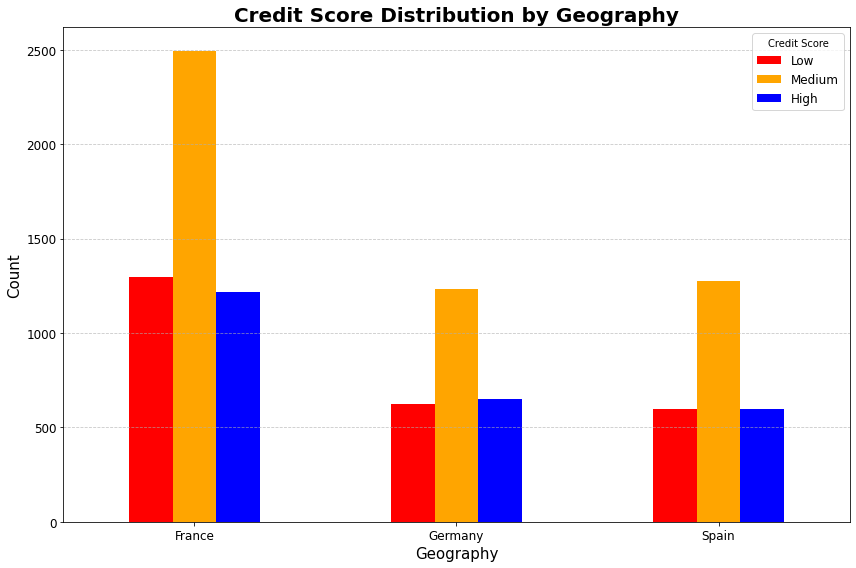

In [60]:
lowCreditScore = df1[df1['CreditScore'] == 'Low']['Geography'].value_counts()
mediumCreditScore = df1[df1['CreditScore'] == 'Medium']['Geography'].value_counts()
highCreditScore = df1[df1['CreditScore'] == 'High']['Geography'].value_counts()

creditScore_geopgraphy = pd.DataFrame({
    'Low': lowCreditScore,
    'Medium' : mediumCreditScore,
    'High' : highCreditScore
})

creditScore_geopgraphy.plot(kind='bar', figsize=(12,8), color=['red','orange','blue'])
plt.title('Credit Score Distribution by Geography', fontsize=20, fontweight='bold')
plt.xlabel('Geography', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend(title='Credit Score', fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

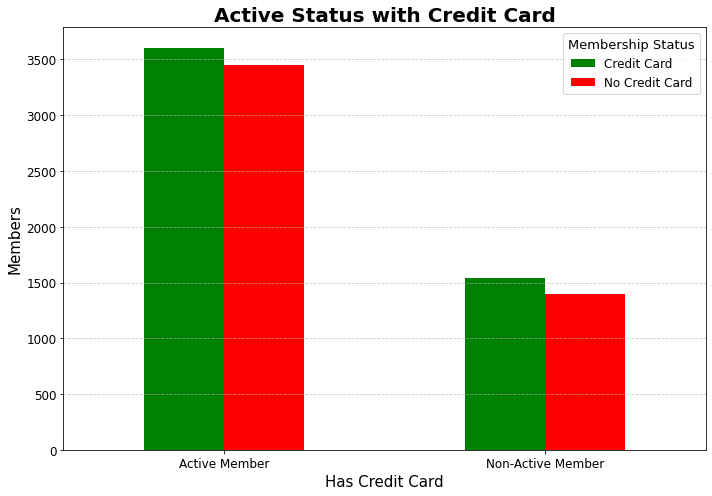

In [85]:
y_creditCard = df[df.HasCrCard == 1]['IsActiveMember'].value_counts()
n_creditCard = df[df.HasCrCard == 0]['IsActiveMember'].value_counts()

creditCard = pd.DataFrame({
    'Active Member': y_creditCard,
    'Non-Active Member': n_creditCard
})

creditCard.T.plot(kind='bar', color=['green', 'red'], figsize=(10,7))
plt.title('Active Status with Credit Card', fontsize=20, fontweight='bold')
plt.legend(title='Membership Status', fontsize=12, title_fontsize=13, labels=['Credit Card', 'No Credit Card'])
plt.xlabel("Has Credit Card", fontsize=15)
plt.ylabel("Members", fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

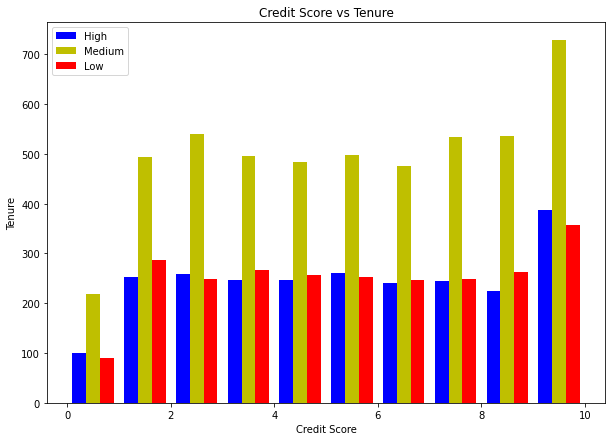

In [41]:
L_creditScore_tenure = df1[df1.CreditScore == 'Low'].Tenure
H_creditScore_tenure = df1[df1.CreditScore == 'High'].Tenure
M_creditScore_tenure = df1[df1.CreditScore == 'Medium'].Tenure

plt.figure(figsize=(10,7))
plt.hist([H_creditScore_tenure, M_creditScore_tenure, L_creditScore_tenure], color=['b','y','r'], label=['High', 'Medium', 'Low'])
plt.title("Credit Score vs Tenure")
plt.xlabel("Credit Score")
plt.ylabel("Tenure")
plt.legend()
plt.show()

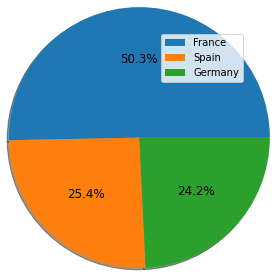

In [42]:
france_activateM = df1[(df1.Geography == 'France') & (df1.IsActiveMember == 1)].shape[0]
spain_activateM = df1[(df1.Geography == 'Spain') & (df1.IsActiveMember == 1)].shape[0]
Germany_activateM = df1[(df1.Geography == 'Germany') & (df1.IsActiveMember == 1)].shape[0]

plt.pie([france_activateM, spain_activateM, Germany_activateM], autopct='%0.1f%%', radius=1.5,
        textprops={'fontsize':12}, shadow=True)
plt.legend(labels=['France', 'Spain', 'Germany'])
plt.show()

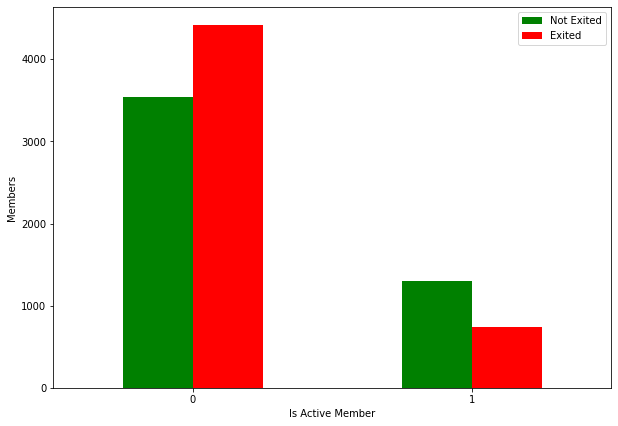

In [43]:
active_member_ext = df[df.IsActiveMember == 1]['Exited'].value_counts()
active_member_Notext = df[df.IsActiveMember == 0]['Exited'].value_counts()

active_ext = pd.DataFrame({
    'Not Exited' : active_member_Notext,
    'Exited' : active_member_ext
})


active_ext.plot(kind='bar', color=['g', 'r'], figsize=(10,7))
plt.xticks(rotation=1)
plt.xlabel("Is Active Member")
plt.ylabel("Members")
plt.show()

### **Training and Prediction**

In [44]:
from sklearn.model_selection import train_test_split

x = df2.drop(['Exited'], axis=1)
y = df2.Exited

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=1)

In [45]:
print(f"x_Train Dataset: {x_train.shape[0]}, y_Train Dataset: {y_train.shape[0]}\nx_Test Dataset: {x_test.shape[0]}, y_Test Dataset: {y_test.shape[0]}")

x_Train Dataset: 2994, y_Train Dataset: 2994
x_Test Dataset: 6987, y_Test Dataset: 6987


In [46]:
x_train[:10]

,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CreditScore_Low,CreditScore_Medium,CreditScore_High,Geography_France,Geography_Germany,Geography_Spain
813,1,-1.040551,1.032521,0.736045,3,1,1,-0.191593,1,0,0,0,1,0
9760,1,-0.754492,-1.042639,0.684190,1,0,0,0.864122,0,1,0,1,0,0
3128,0,-0.468434,0.340801,0.989350,2,0,1,0.807983,0,0,1,0,0,1
5871,0,-0.563787,-1.042639,2.110771,1,0,0,-0.856470,1,0,0,1,0,0
5273,1,-0.659139,1.378381,1.138451,1,1,0,-1.154088,1,0,0,1,0,0
6038,0,-1.135904,0.686661,0.455022,1,1,1,1.170932,0,1,0,0,1,0
3704,0,-0.468434,0.686661,-1.225277,2,1,0,1.616601,0,1,0,1,0,0
7996,0,-1.612668,-0.005059,0.577081,1,1,1,-0.122738,0,1,0,1,0,0
4326,1,-1.135904,-0.696779,-1.225277,3,1,1,0.505799,0,1,0,0,0,1
8715,1,0.199036,-1.734359,1.046395,1,0,1,-1.579255,1,0,0,0,1,0


In [47]:
x_train.shape

(2994, 14)

In [48]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(8, input_shape=(14, ), activation='relu'),
    keras.layers.Dense(2, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 120       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
75/75 [==============================] - 0s 2ms/step - loss: 0.8227 - acc: 0.4109 - val_loss: 0.7395 - val_acc: 0.5376
Epoch 2/100
75/75 [==============================] - 0s 870us/step - loss: 0.6985 - acc: 0.6271 - val_loss: 0.6719 - val_acc: 0.7129
Epoch 3/100
75/75 [==============================] - 0s 868us/step - loss: 0.6592 - acc: 0.7399 - val_loss: 0.6432 - val_acc: 0.7846
Epoch 4/100
75/75 [==============================] - 0s 893us/step - loss: 0.6388 - acc: 0.7766 - val_loss: 0.6241 - val_acc: 0.8097
Epoch 5/100
75/75 [==============================] - 0s 884us/step - loss: 0.6235 - acc: 0.7866 - val_loss: 0.6090 - val_acc: 0.8130
Epoch 6/100
75/75 [==============================] - 0s 797us/step - loss: 0.6104 - acc: 0.7871 - val_loss: 0.5956 - val_acc: 0.8130
Epoch 7/100
75/75 [==============================] - 0s 792us/step - loss: 0.5985 - acc: 0.7871 - val_loss: 0.5828 - val_acc: 0.8147
Epoch 8/100
75/75 [==============================] - 0s 833us/step - lo

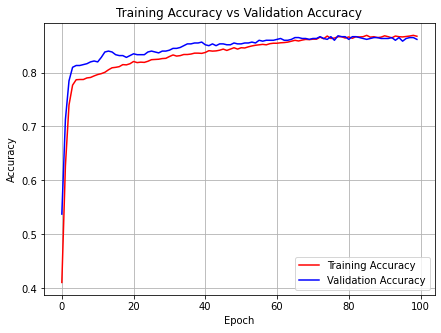

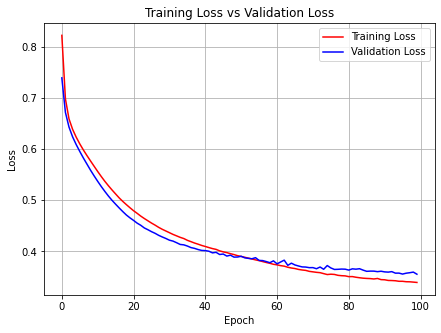

In [51]:
tr_acc = history.history['acc']
val_acc = history.history['val_acc']

tr_loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(7,5))

plt.subplot(1,1,1)
plt.plot(tr_acc, color='r', linestyle='-', label='Training Accuracy')
plt.plot(val_acc, color='b', linestyle='-', label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()


plt.figure(figsize=(7,5))

plt.subplot(1,1,1)
plt.plot(tr_loss, color='r', linestyle='-', label='Training Loss')
plt.plot(val_loss, color='b', linestyle='-', label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()


plt.show()

In [52]:
accuracy = model.evaluate(x_test, y_test)

219/219 [==============================] - 0s 486us/step - loss: 0.3656 - acc: 0.8499


In [53]:
print(f"Accuracy: {accuracy[1]:.2f}")

Accuracy: 0.85


In [54]:
y_log = model.predict(x_test)
y_log[:5]

array([[0.10553143],
       [0.05791407],
       [0.6338875 ],
       [0.05791407],
       [0.05791407]], dtype=float32)

In [55]:
y_pred = []
for i in y_log:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [56]:
y_test[0:20]

2774    0
4119    0
6857    1
8640    0
6881    0
966     0
1143    0
5619    0
5452    1
1652    0
3069    1
620     0
807     0
6300    0
5806    0
1581    0
4754    1
9233    0
5488    0
4085    0
Name: Exited, dtype: int64

In [57]:
y_pred[0:20]

[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]